In [32]:
import pandas as pd
import numpy as np

In [33]:
df = pd.read_csv('fake_reg.csv')

In [34]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\saira\anaconda3\envs\tensorflow\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


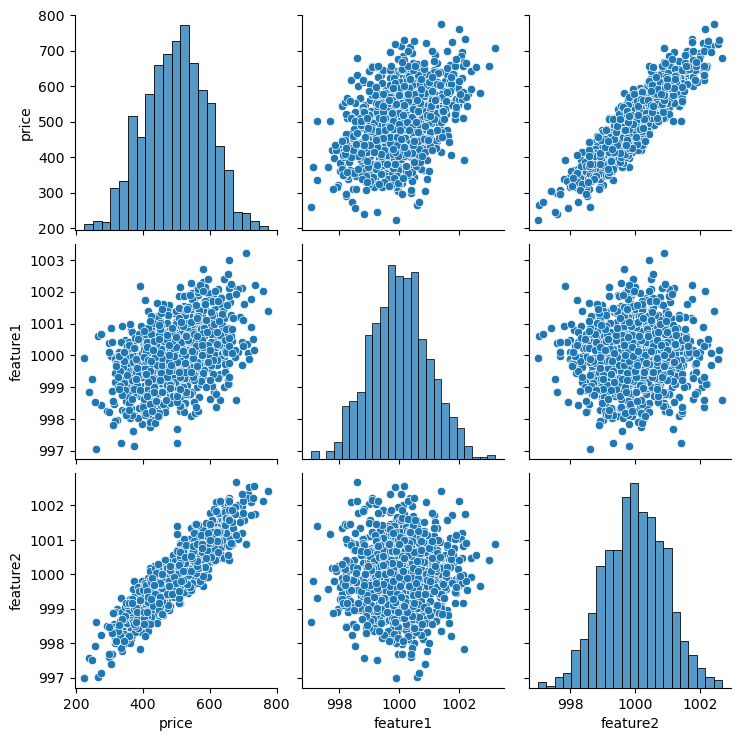

In [36]:
sns.pairplot(df)

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X = df[['feature1', 'feature2']].values
y = df['price'].values

In [39]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 2), (300, 2), (700,), (300,))

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : bo

In [44]:
scaler = MinMaxScaler()

In [45]:
scaler.fit(X_train)

MinMaxScaler()

In [46]:
scaler.transform(X_train)

array([[0.74046017, 0.32583248],
       [0.43166001, 0.2555088 ],
       [0.18468554, 0.70500664],
       ...,
       [0.54913363, 0.79933822],
       [0.2834197 , 0.38818708],
       [0.56282703, 0.42371827]])

In [47]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
X_train.max()

1.0

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense   


In [50]:
help(Sequential)
help(Dense)

Help on class Sequential in module tensorflow.python.keras.engine.sequential:

class Sequential(tensorflow.python.keras.engine.functional.Functional)
 |  Sequential(*args, **kwargs)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  >>> # Optionally, the first layer can receive an `input_shape` argument:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  >>> # Afterwards, we do automatic shape inference:
 |  >>> model.add(tf.keras.layers.Dense(4))
 |  
 |  >>> # This is identical to the following:
 |  >>> model = tf.keras.Sequential()
 |  >>> model.add(tf.keras.Input(shape=(16,)))
 |  >>> model.add(tf.keras.layers.Dense(8))
 |  
 |  >>> # Note that you can also omit the `input_shape` argument.
 |  >>> # In that case the model doesn't have any weights until the first call
 |  >>> # to a training/evalua

In [51]:
model = Sequential()
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse')


In [52]:
from tensorflow.keras.utils import plot_model

#plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [55]:
model.fit(X_train, y_train, epochs=250, verbose=2)


Epoch 1/250
22/22 - 0s - loss: 251283.6094
Epoch 2/250
22/22 - 0s - loss: 251262.0625
Epoch 3/250
22/22 - 0s - loss: 251240.3906
Epoch 4/250
22/22 - 0s - loss: 251218.8281
Epoch 5/250
22/22 - 0s - loss: 251197.2188
Epoch 6/250
22/22 - 0s - loss: 251175.5938
Epoch 7/250
22/22 - 0s - loss: 251153.9688
Epoch 8/250
22/22 - 0s - loss: 251132.4062
Epoch 9/250
22/22 - 0s - loss: 251110.7500
Epoch 10/250
22/22 - 0s - loss: 251089.1719
Epoch 11/250
22/22 - 0s - loss: 251067.6094
Epoch 12/250
22/22 - 0s - loss: 251046.0312
Epoch 13/250
22/22 - 0s - loss: 251024.3438
Epoch 14/250
22/22 - 0s - loss: 251002.8125
Epoch 15/250
22/22 - 0s - loss: 250981.1406
Epoch 16/250
22/22 - 0s - loss: 250959.6094
Epoch 17/250
22/22 - 0s - loss: 250937.9688
Epoch 18/250
22/22 - 0s - loss: 250916.4062
Epoch 19/250
22/22 - 0s - loss: 250894.8125
Epoch 20/250
22/22 - 0s - loss: 250873.1719
Epoch 21/250
22/22 - 0s - loss: 250851.6094
Epoch 22/250
22/22 - 0s - loss: 250830.0781
Epoch 23/250
22/22 - 0s - loss: 250808.40

<Axes: >

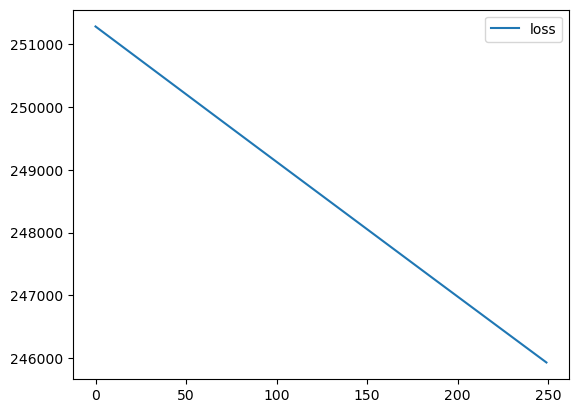

In [56]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()